In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import random
import seaborn as sns

### PART A

In [2]:
# Defining the file paths
file_path1 = r"C:\Users\Rohit Srivastava\OneDrive\Desktop\ISB\Sixth Term\Assignments\MA\Individual Assignments\2\demographics-full.xlsx"
file_path2 = r"C:\Users\Rohit Srivastava\OneDrive\Desktop\ISB\Sixth Term\Assignments\MA\Individual Assignments\2\mugs-preference-parameters-full.xlsx"

# Loading the data
demographics_data = pd.read_excel(file_path1)
preference_data = pd.read_excel(file_path2)

In [3]:
demographics_data

,id,income,age,sports,gradschl
0,1,63,46,0,0
1,2,65,48,0,0
2,3,38,37,0,0
3,4,77,58,1,1
4,5,44,41,0,0
...,...,...,...,...,...
306,307,44,40,0,0
307,308,67,51,1,1
308,309,56,43,1,0
309,310,39,39,0,0


In [4]:
preference_data

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,1,3,7,1,3,7,1,7,6,...,7,7,5,1,5,8,32,7,34,14
1,2,1,6,7,1,4,7,1,7,6,...,7,7,5,1,6,3,17,10,51,15
2,3,1,6,7,1,4,7,7,4,1,...,7,1,3,7,55,5,5,8,16,9
3,4,1,6,7,1,4,7,7,1,3,...,7,7,1,5,12,9,3,40,20,16
4,5,1,4,7,1,4,7,1,7,2,...,7,3,1,7,56,6,19,9,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,1,3,7,1,6,7,1,7,6,...,7,4,1,7,54,13,6,10,7,10
307,308,1,3,7,1,6,7,1,7,6,...,7,7,1,4,8,24,4,39,15,11
308,309,1,6,7,1,5,7,1,7,3,...,7,7,3,1,12,34,16,14,13,11
309,310,1,3,7,1,5,7,1,7,1,...,7,1,5,7,57,5,5,17,5,10


In [5]:
#'Cust' in preference_data and 'id' in demographics_data refer to the same customer identifier
merged_data = pd.merge(preference_data, demographics_data, left_on='Cust', right_on='id')

In [6]:
merged_data

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,Iin,ICp,ICl,Icn,IBr,id,income,age,sports,gradschl
0,1,1,3,7,1,3,7,1,7,6,...,8,32,7,34,14,1,63,46,0,0
1,2,1,6,7,1,4,7,1,7,6,...,3,17,10,51,15,2,65,48,0,0
2,3,1,6,7,1,4,7,7,4,1,...,5,5,8,16,9,3,38,37,0,0
3,4,1,6,7,1,4,7,7,1,3,...,9,3,40,20,16,4,77,58,1,1
4,5,1,4,7,1,4,7,1,7,2,...,6,19,9,0,11,5,44,41,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,1,3,7,1,6,7,1,7,6,...,13,6,10,7,10,307,44,40,0,0
307,308,1,3,7,1,6,7,1,7,6,...,24,4,39,15,11,308,67,51,1,1
308,309,1,6,7,1,5,7,1,7,3,...,34,16,14,13,11,309,56,43,1,0
309,310,1,3,7,1,5,7,1,7,1,...,5,5,17,5,10,310,39,39,0,0


In [7]:
merged_data.columns

Index(['Cust', ' pPr30', ' pPr10', ' pPr05', 'pIn0.5', 'pIn1', 'pIn3',
       ' pCp12', ' pCp20', ' pCp32', ' pClD', ' pClF', ' pClE', 'pCnSl',
       'pCnSp', 'pCnLk', ' pBrA', ' pBrB', ' pBrC', ' IPr', 'Iin', ' ICp',
       ' ICl', 'Icn', ' IBr', 'id', 'income', 'age', 'sports', 'gradschl'],
      dtype='object')

In [8]:
merged_data.columns = merged_data.columns.str.strip()

In [9]:
# Define attribute levels
price_levels = [30, 10, 5]
time_levels = [0.5, 1, 3]
capacity_levels = [12, 20, 32]
cleanability_levels = ["Difficult", "Fair", "Easy"]
containment_levels = ["Slosh resistant", "Spill resistant", "Leak resistant"]
brand_levels = ["A", "B", "C"]

# Define cost structure
time_cost = {0.5: 0.5, 1: 1, 3: 3}
capacity_cost = {12: 1.00, 20: 2.6, 32: 2.8}
cleanability_cost = {"Difficult": 1, "Fair": 2.2, "Easy": 3.0}
containment_cost = {"Slosh resistant": 0.5, "Spill resistant": 0.8, "Leak resistant": 1}

# Define product attributes
product_attributes = [
    {"price": 30, "time": 3, "capacity": 20, "cleanability": "Easy", "containment": "Leak resistant", "brand": "A"},
    {"price": 10, "time": 1, "capacity": 20, "cleanability": "Fair", "containment": "Spill resistant", "brand": "B"},
    {"price": 30, "time": 3, "capacity": 20, "cleanability": "Easy", "containment": "Leak resistant", "brand": "C"}
]

# Calculate utility for each product
def calculate_utility(attributes):
    utility = 0
    utility += attributes["price"]
    utility -= time_cost[attributes["time"]]
    utility -= capacity_cost[attributes["capacity"]]
    utility -= cleanability_cost[attributes["cleanability"]]
    utility -= containment_cost[attributes["containment"]]
    return utility

product_utilities = []
for attributes in product_attributes:
    product_utilities.append(calculate_utility(attributes))

# Calculate the total utility
total_utility = sum(product_utilities)

# Calculate the probability of each product being chosen
product_probabilities = [utility / total_utility for utility in product_utilities]

# Display the results
for i, brand in enumerate(brand_levels):
    print(f"Probability of choosing Brand {brand}:", product_probabilities[i])

Probability of choosing Brand A: 0.46153846153846156
Probability of choosing Brand B: 0.07692307692307694
Probability of choosing Brand C: 0.46153846153846156


In [10]:
# Define attributes for each product
product_1_attributes = {
    'Price': 30,
    'Time_Insulated': 3,
    'Capacity': 20,
    'Cleanability': 'Easy',  
    'Containment': 'Leak_resistant',
    'Brand': 'A'
}

product_2_attributes = {
    'Price': 10,
    'Time_Insulated': 1,
    'Capacity': 20,
    'Cleanability': 'Fair',  
    'Containment': 'Spill_resistant',
    'Brand': 'B'
}

product_3_attributes = {
    'Price': 30,
    'Time_Insulated': 3,
    'Capacity': 20,
    'Cleanability': 'Easy',  
    'Containment': 'Leak_resistant',
    'Brand': 'C'
}

In [11]:
# Function to calculate utility for a given product
def calculate_utility(row, product_attributes):
    utility = 0

    # Price
    if product_attributes['Price'] == 30:
        utility += row['pPr30']
    elif product_attributes['Price'] == 10:
        utility += row['pPr10']
    # Note: No other price levels specified in the given data

    # Time Insulated
    if product_attributes['Time_Insulated'] == 3:
        utility += row['pIn3']
    elif product_attributes['Time_Insulated'] == 1:
        utility += row['pIn1']
    # Note: No other insulation times specified in the given data

    # Capacity
    if product_attributes['Capacity'] == 20:
        utility += row['pCp20']
    # Note: No other capacity levels specified in the given data

    # Cleanability
    if product_attributes['Cleanability'] == 'Easy':
        utility += row['pClE']
    elif product_attributes['Cleanability'] == 'Fair':
        utility += row['pClF']
    # Note: No conditions for 'Difficult' 

    # Containment
    if product_attributes['Containment'] == 'Leak_resistant':
        utility += row['pCnLk']
    elif product_attributes['Containment'] == 'Spill_resistant':
        utility += row['pCnSp']
    # Note: No conditions for 'Slosh resistant' 

    # Brand
    if product_attributes['Brand'] == 'A':
        utility += row['pBrA']
    elif product_attributes['Brand'] == 'B':
        utility += row['pBrB']
    elif product_attributes['Brand'] == 'C':
        utility += row['pBrC']

    return utility

In [12]:
# Print all column names in the DataFrame
print(merged_data.columns.tolist())

# Calculate utility values for each product
merged_data['Utility_1'] = merged_data.apply(calculate_utility, axis=1, args=(product_1_attributes,))
merged_data['Utility_2'] = merged_data.apply(calculate_utility, axis=1, args=(product_2_attributes,))
merged_data['Utility_3'] = merged_data.apply(calculate_utility, axis=1, args=(product_3_attributes,))

# Apply exponential transformation
multiplier = 0.0139
merged_data['Exp_Utility_1'] = np.exp(merged_data['Utility_1'] * multiplier)
merged_data['Exp_Utility_2'] = np.exp(merged_data['Utility_2'] * multiplier)
merged_data['Exp_Utility_3'] = np.exp(merged_data['Utility_3'] * multiplier)

# Calculate probabilities
total_exp_utility = merged_data[['Exp_Utility_1', 'Exp_Utility_2', 'Exp_Utility_3']].sum(axis=1)
merged_data['Prob_1'] = merged_data['Exp_Utility_1'] / total_exp_utility
merged_data['Prob_2'] = merged_data['Exp_Utility_2'] / total_exp_utility
merged_data['Prob_3'] = merged_data['Exp_Utility_3'] / total_exp_utility

['Cust', 'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12', 'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk', 'pBrA', 'pBrB', 'pBrC', 'IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr', 'id', 'income', 'age', 'sports', 'gradschl']


In [13]:
merged_data

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,gradschl,Utility_1,Utility_2,Utility_3,Exp_Utility_1,Exp_Utility_2,Exp_Utility_3,Prob_1,Prob_2,Prob_3
0,1,1,3,7,1,3,7,1,7,6,...,0,36,25,30,1.649381,1.415524,1.517403,0.359945,0.308911,0.331144
1,2,1,6,7,1,4,7,1,7,6,...,0,36,35,30,1.649381,1.626613,1.517403,0.344094,0.339345,0.316561
2,3,1,6,7,1,4,7,7,4,1,...,0,27,25,33,1.455428,1.415524,1.582016,0.326844,0.317883,0.355272
3,4,1,6,7,1,4,7,7,1,3,...,1,30,22,28,1.517403,1.357711,1.475800,0.348755,0.312052,0.339193
4,5,1,4,7,1,4,7,1,7,2,...,0,32,26,36,1.560178,1.435337,1.649381,0.335891,0.309014,0.355095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,1,3,7,1,6,7,1,7,6,...,0,33,29,36,1.582016,1.496457,1.649381,0.334616,0.316519,0.348865
307,308,1,3,7,1,6,7,1,7,6,...,1,36,25,33,1.649381,1.415524,1.582016,0.354941,0.304616,0.340444
308,309,1,6,7,1,5,7,1,7,3,...,0,36,26,30,1.649381,1.435337,1.517403,0.358396,0.311886,0.329718
309,310,1,3,7,1,5,7,1,7,1,...,0,30,28,36,1.517403,1.475800,1.649381,0.326844,0.317883,0.355272


In [14]:
# Prob_1', 'Prob_2', 'Prob_3' are the columns for probabilities of choosing products 1, 2, and 3 respectively

# Define the descriptors (column names in merged_data) for the analysis
descriptors = ['IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr', 
               'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 
               'pCp12', 'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 
               'pCnSl', 'pCnSp', 'pCnLk', 'pBrA', 'pBrB', 'pBrC', 
               'income', 'age', 'sports', 'gradschl']

# Function to calculate weighted averages
def weighted_average(df, weights_column):
    weights = df[weights_column]
    return df[descriptors].multiply(weights, axis='index').sum() / weights.sum()

# Calculate weighted averages for Product 3
weighted_avg_product_3 = weighted_average(merged_data, 'Prob_3')

# Calculate weighted averages for Product 1
weighted_avg_product_1 = weighted_average(merged_data, 'Prob_1')

# Calculate weighted averages for Product 2
weighted_avg_product_2 = weighted_average(merged_data, 'Prob_2')

# Print the weighted averages for inspection (optional)
print("Weighted Averages for Product 1:", weighted_avg_product_1)
print("Weighted Averages for Product 2:", weighted_avg_product_2)
print("Weighted Averages for Product 3:", weighted_avg_product_3)

Weighted Averages for Product 1: IPr         28.753673
Iin         10.985513
ICp         13.645082
ICl         17.439139
Icn         16.192550
IBr         12.984624
pPr30        1.000000
pPr10        5.252396
pPr05        7.000000
pIn0.5       1.000000
pIn1         4.032173
pIn3         7.000000
pCp12        3.155803
pCp20        5.346749
pCp32        3.887718
pClD         1.000000
pClF         4.930397
pClE         7.000000
pCnSl        1.000000
pCnSp        3.941456
pCnLk        7.000000
pBrA         4.022221
pBrB         3.968742
pBrC         3.952518
income      55.177134
age         45.037744
sports       0.338635
gradschl     0.334580
dtype: float64
Weighted Averages for Product 2: IPr         29.177318
Iin         10.866203
ICp         13.450303
ICl         17.452772
Icn         16.075330
IBr         12.976677
pPr30        1.000000
pPr10        5.288568
pPr05        7.000000
pIn0.5       1.000000
pIn1         4.068338
pIn3         7.000000
pCp12        3.159778
pCp20        5.34

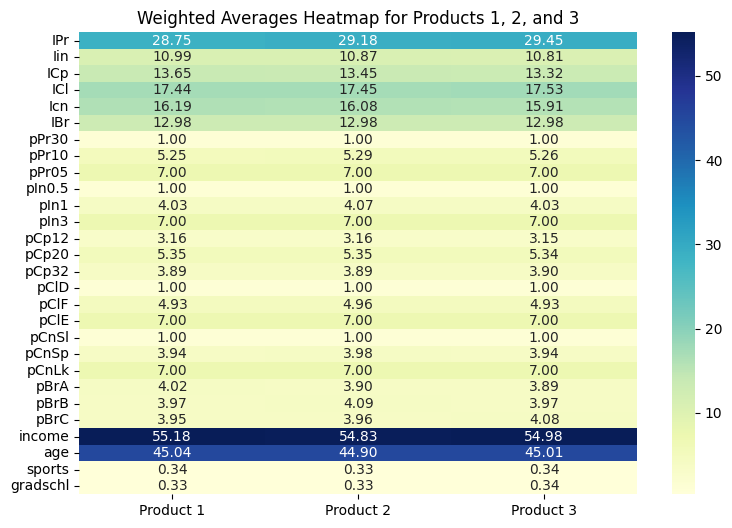

In [15]:
# Combine the weighted averages into a DataFrame for heatmap
weighted_avgs = pd.DataFrame({
    'Product 1': weighted_avg_product_1,
    'Product 2': weighted_avg_product_2,
    'Product 3': weighted_avg_product_3
})

# Generate the heatmap
plt.figure(figsize=(9,6))
sns.heatmap(weighted_avgs, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Weighted Averages Heatmap for Products 1, 2, and 3')
plt.show()

In [16]:
# Calculate overall mean for each descriptor
overall_means = merged_data[descriptors].mean()

# Function to calculate log-lifts
def calculate_log_lifts(weighted_avg, overall_means):
    return np.log10(weighted_avg / overall_means)

# Calculate log-lifts for Product 3
log_lifts_product_3 = calculate_log_lifts(weighted_avg_product_3, overall_means)

# Calculate log-lifts for Product 1
log_lifts_product_1 = calculate_log_lifts(weighted_avg_product_1, overall_means)

# Calculate log-lifts for Product 2
log_lifts_product_2 = calculate_log_lifts(weighted_avg_product_2, overall_means)

# Print the log-lifts for inspection (optional)
print("Log-lifts for Product 1:", log_lifts_product_1)
print("Log-lifts for Product 2:", log_lifts_product_2)
print("Log-lifts for Product 3:", log_lifts_product_3)

Log-lifts for Product 1: IPr        -0.005579
Iin         0.003894
ICp         0.005523
ICl        -0.000914
Icn         0.003627
IBr         0.000131
pPr30       0.000000
pPr10      -0.001196
pPr05       0.000000
pIn0.5      0.000000
pIn1       -0.001036
pIn3        0.000000
pCp12       0.000201
pCp20       0.000219
pCp32      -0.000330
pClD        0.000000
pClF       -0.001032
pClE        0.000000
pCnSl       0.000000
pCnSp      -0.001135
pCnLk       0.000000
pBrA        0.009090
pBrB       -0.004105
pBrC       -0.004837
income      0.001422
age         0.000519
sports      0.005459
gradschl    0.000227
dtype: float64
Log-lifts for Product 2: IPr         7.734465e-04
Iin        -8.487329e-04
ICp        -7.215680e-04
ICl        -5.747472e-04
Icn         4.717397e-04
IBr        -1.348596e-04
pPr30       0.000000e+00
pPr10       1.784603e-03
pPr05       9.643275e-17
pIn0.5      0.000000e+00
pIn1        2.842088e-03
pIn3        9.643275e-17
pCp12       7.479701e-04
pCp20       2.536473e-

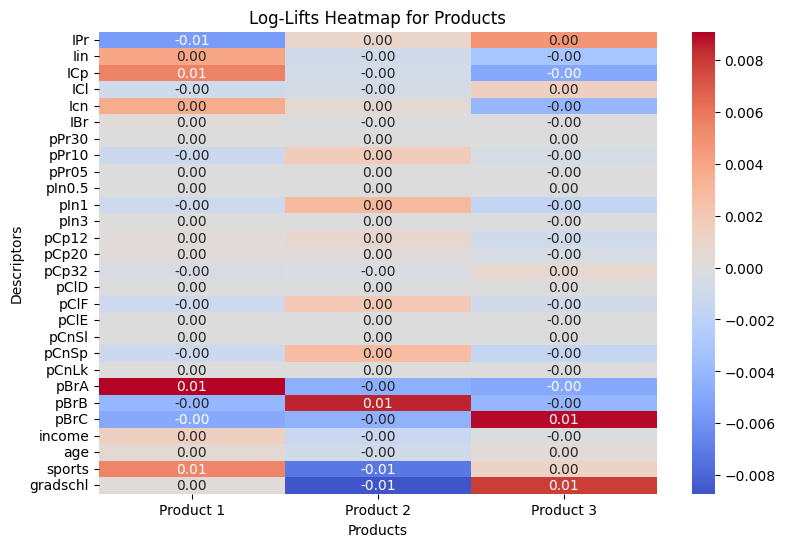

In [17]:
# Create a DataFrame from the log-lifts
log_lifts_df = pd.DataFrame({'Product 1': log_lifts_product_1, 
                             'Product 2': log_lifts_product_2, 
                             'Product 3': log_lifts_product_3})

# Plotting the heatmap
plt.figure(figsize=(9,6))
sns.heatmap(log_lifts_df, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Log-Lifts Heatmap for Products')
plt.ylabel('Descriptors')
plt.xlabel('Products')
plt.show()

## Characteristics of the Affinity-Based Segment for Each Product:

#### Product 1 (Brand A):

#### High Price Importance: Reflected by a slightly negative log-lift in pPr10, indicating a preference for the $30 price point.
#### Moderate on Capacity and Cleanability: Supported by the positive weighted averages in ICp and ICl.
#### Preference for Brand A: Indicated by the highest positive log-lift for pBrA.
#### Moderate Income and Age Group: Shown by the weighted averages for income and age.
#### Slightly More Sports-Active and Educated: Positive log-lifts for sports and gradschl support this.

#### Product 2 (Brand B):

#### Highest Price Importance: This is evident from the highest positive log-lift in pPr10, showing a strong preference for the lower price point.
#### Less Importance on Capacity and Cleanability: Supported by the negative log-lifts in ICp and ICl.
#### Strong Preference for Brand B: Highest positive log-lift in pBrB.
#### Slightly Lower Income and Younger Age Group: Lower weighted averages for income and age, and negative log-lifts in these descriptors.
#### Less Sports-Active and Educated: Negative log-lifts in sports and gradschl.

#### Product 3 (Brand C):

#### Similar Price Importance to Product 1: Reflected in the similar log-lifts for pPr10 between Products 1 and 3.
#### Slightly Less on Capacity, More on Cleanability: Supported by the weighted averages and log-lifts.
#### Strong Preference for Brand C: Highest positive log-lift in pBrC.
#### Similar Income and Age Group to Product 1: Weighted averages are closely aligned.
#### Slightly More Sports-Active and Educated than Product 1: Higher positive log-lifts in sports and gradschl compared to Product 1.

## Log-Lift Analysis:

Log-lifts indicate how much more or less important a particular descriptor is for the segment compared to the overall population.
Positive Log-Lifts suggest that the descriptor is more important for the segment than the average customer.

For Product 3, descriptors like gradschl and pBrC have higher positive log-lifts, indicating these are more distinguishing features for this product's segment.

Negative Log-Lifts suggest that the descriptor is less important for the segment than the average customer.

For Product 2, gradschl has a negative log-lift, implying less importance of higher education in this segment.

#### Verbal Description and Persona Story:

##### Product 1 (Brand A): "The Prudent Professionals" - This segment comprises moderately income-earning, slightly older professionals who value a balance between quality and cost. They are somewhat active in sports and value education, reflecting a well-rounded lifestyle.

##### Product 2 (Brand B): "The Budget-Conscious Youngsters" - Dominated by younger individuals with a lower income bracket. They are less likely to be highly educated or sports-active. This group seeks affordable options without a strong preference for advanced features.

##### Product 3 (Brand C): "The Selective Elite" - This segment mirrors Brand A's customer base but places higher value on brand distinction and product features like cleanability. They are slightly more educated and sports-active, indicating a lifestyle that balances professional success with personal well-being.

## Part B

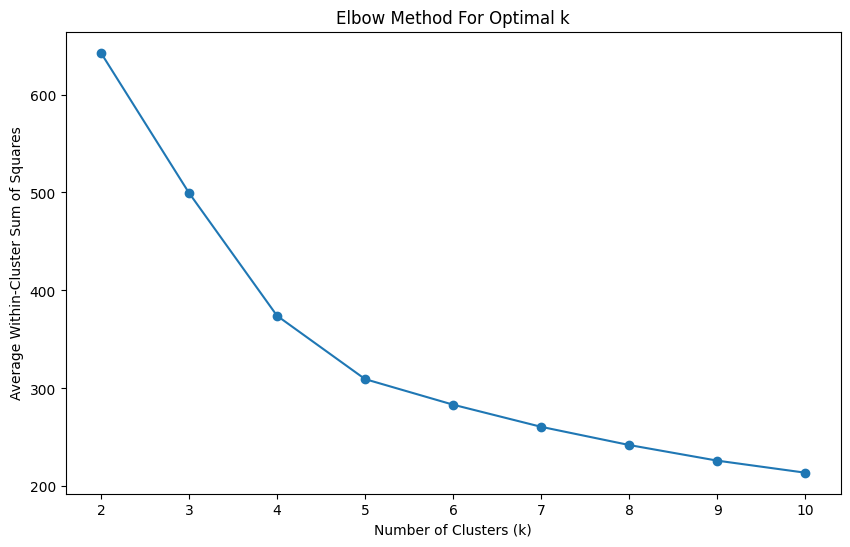

In [18]:
# Set random seed
random.seed(410014)

# Define the columns for K-means
kmeans_cols = descriptors[:-4]  # Exclude demographic variables

# Prepare data for clustering
X = merged_data[kmeans_cols].values

# Dictionary to store average within-cluster sum of squares
within_cluster_sums = {}

# Trying different values of k (2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=100, random_state=410014)
    kmeans.fit(X)
    within_cluster_sums[k] = kmeans.inertia_ / X.shape[0]

# Plotting the results for the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(list(within_cluster_sums.keys()), list(within_cluster_sums.values()), marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
# Choosing an optimal k based on the plot 
optimal_k = 4 

# Final K-means clustering
kmeans_final = KMeans(n_clusters=optimal_k, n_init=50, max_iter=100, random_state=410014)
kmeans_final.fit(X)

# Add cluster labels to the DataFrame
merged_data['Cluster'] = kmeans_final.labels_

# Compute characteristics and log-lifts for each segment
for i in range(optimal_k):
    cluster_profile = weighted_average(merged_data[merged_data['Cluster'] == i], 'Prob_3')
    log_lifts_cluster = calculate_log_lifts(cluster_profile, overall_means)
    print(f"Cluster {i+1} Profile:\n{cluster_profile}\n")
    print(f"Cluster {i+1} Log-Lifts:\n{log_lifts_cluster}\n")

Cluster 1 Profile:
IPr         16.554293
Iin         10.786243
ICp          8.193013
ICl         39.275936
Icn         12.198496
IBr         12.976161
pPr30        1.000000
pPr10        5.189242
pPr05        7.000000
pIn0.5       1.000000
pIn1         3.732892
pIn3         7.000000
pCp12        3.237032
pCp20        5.617318
pCp32        3.468414
pClD         1.000000
pClF         5.260418
pClE         7.000000
pCnSl        1.000000
pCnSp        3.722362
pCnLk        7.000000
pBrA         3.666176
pBrB         4.243547
pBrC         3.958646
income      63.184204
age         50.280503
sports       0.717736
gradschl     0.652590
dtype: float64

Cluster 1 Log-Lifts:
IPr        -2.453613e-01
Iin        -4.056354e-03
ICp        -2.160100e-01
ICl         3.516874e-01
Icn        -1.193819e-01
IBr        -1.521274e-04
pPr30       0.000000e+00
pPr10      -6.449575e-03
pPr05       9.643275e-17
pIn0.5      0.000000e+00
pIn1       -3.452947e-02
pIn3        9.643275e-17
pCp12       1.123841e-02
pCp

In [20]:
# Initialize empty dataframes to store profiles and log-lifts
cluster_profiles = pd.DataFrame()
cluster_log_lifts = pd.DataFrame()

# Compute characteristics and log-lifts for each segment and store them
for i in range(optimal_k):
    cluster_profile = weighted_average(merged_data[merged_data['Cluster'] == i], 'Prob_3')
    log_lifts_cluster = calculate_log_lifts(cluster_profile, overall_means)

    cluster_profiles[f'Cluster {i+1}'] = cluster_profile
    cluster_log_lifts[f'Cluster {i+1}'] = log_lifts_cluster

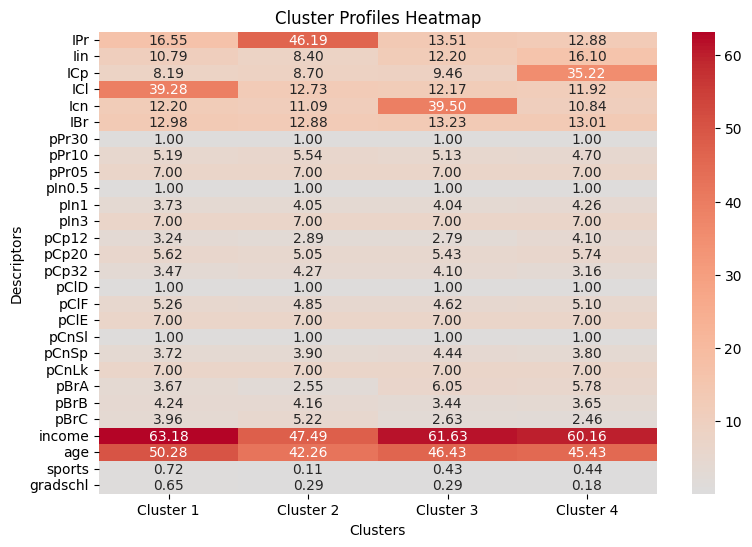

In [21]:
# Plotting the cluster profiles heatmap
plt.figure(figsize=(9,6))
sns.heatmap(cluster_profiles, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Cluster Profiles Heatmap')
plt.ylabel('Descriptors')
plt.xlabel('Clusters')
plt.show()

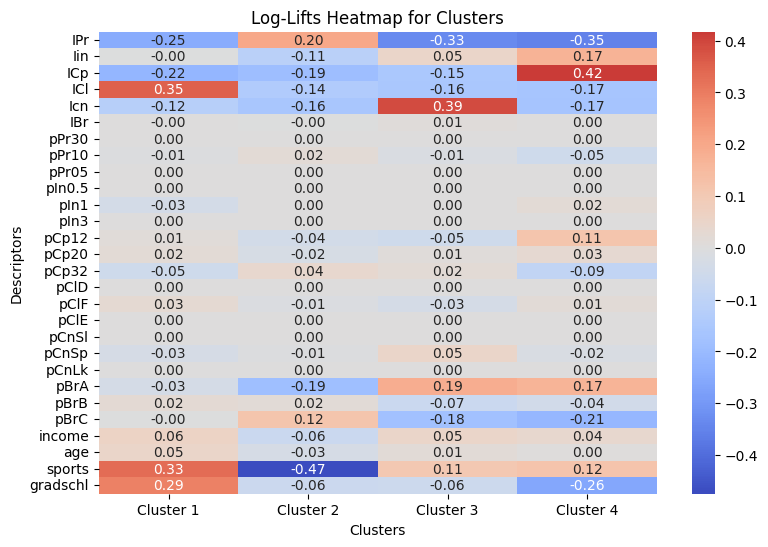

In [22]:
# Plotting the log-lifts heatmap
plt.figure(figsize=(9,6))
sns.heatmap(cluster_log_lifts, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Log-Lifts Heatmap for Clusters')
plt.ylabel('Descriptors')
plt.xlabel('Clusters')
plt.show()

#### Cluster 1: "The Quality-Conscious Segment"
Characteristics: This segment places a high value on cleanability and capacity. They have a moderate price sensitivity, with a leaning towards moderately priced products.
Demographics: They are characterized by a higher income, older age group, and are more likely to be sports-active and hold graduate degrees.
Log-Lift Insights: The significant positive log-lift in cleanability and income indicates a preference for high-quality, easy-to-clean products by more affluent, older customers.

#### Cluster 2: "The Price-Sensitive Segment"
Characteristics: Exhibits the highest price sensitivity and a moderate preference for capacity and cleanability.
Demographics: This segment includes customers with lower income and age. They are less likely to be sports-active or highly educated.
Log-Lift Insights: High positive log-lifts in price and a negative log-lift in sports indicate a focus on affordability and less involvement in sports activities.

#### Cluster 3: "The Brand Loyalists"
Characteristics: Shows a strong preference for containment and a specific brand (Brand A), with moderate price sensitivity.
Demographics: Consists of middle-aged, relatively high-income individuals who are more sports-active and slightly more educated.
Log-Lift Insights: High positive log-lifts in containment and brand preference suggest a strong loyalty to Brand A and a value placed on the product's functionality.

#### Cluster 4: "The Feature-Focused Segment"
##### Characteristics: This group emphasizes capacity and insulation time, indicating a preference for larger, more insulated products.
##### Demographics: They are characterized by relatively high income, middle-aged individuals who are more likely to be sports-active but less likely to have graduate degrees.
##### Log-Lift Insights: High positive log-lifts in capacity and insulation time, combined with negative log-lifts in graduate schooling, suggest a practical focus on product features over academic achievements.

#### Overall Implications for Marketing Strategy:
##### Cluster 1 can be targeted with high-quality, easy-to-maintain products, with marketing messages emphasizing product longevity and quality.
##### Cluster 2 would respond well to promotions and discounts, with a focus on value-for-money products.
##### Cluster 3 should be approached with brand-centric marketing, emphasizing brand loyalty and trust.
##### Cluster 4 can be targeted with products featuring superior capacity and insulation, highlighting practical benefits and usability.

#### Saving file for implementation and execution challenges 2 

In [23]:
# Convert the numpy array X back to a DataFrame
data_for_clustering = pd.DataFrame(X, columns=kmeans_cols)

# Saving the DataFrame to CSV
csv_file_path = 'C:/Users/Rohit Srivastava/clustering_data.csv'  
data_for_clustering.to_csv(csv_file_path, index=False)